# Tricky Things

## Checksum

checksum in wireshark sometimes is 0x0000 because it's captured before the field is calculated.

However, when send with Pcap into wifi, it should be correct.

## Loopback

Sometimes Aethernet addresses will be recognized as loopback.

Then, the first indicator of it is that the packets captured will become IP packets instead of Ethernet packets.

Check the routing table. If the address is there, delete it. (need Admin)

It turns out that I set the IP of Aethernet adapter to 172.0.0.1, LOL

## CMD

ping in cmd will require IPv4 header checksum

## NAT

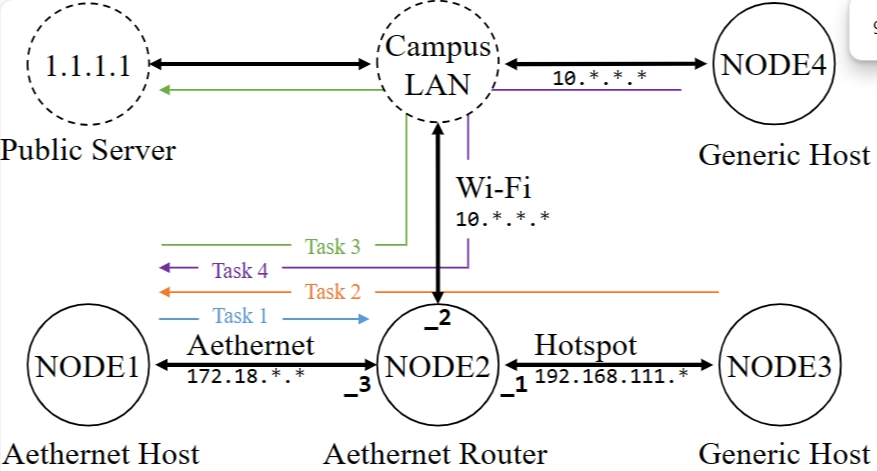

NODE 1 should not be directly connected to the Internet. It should make the connection to 1.1.1.1 through NODE 2.

However, a task requires to ping 1.1.1.1 though NODE 1's cmd. If I disconnect from school LAN, then I can't capture any packets indicating I'm pinging 1.1.1.1. My tricky solution is connecting to guest LAN without authentication.

# MAC

NODE2 ping NODE1

1. NODE2 transmit
2. NODE1 ACK
3. NODE1 reply

2 and 3 are too close. This causes a problem.

decode() will handle all the available samples all at once. It is called in decodeThread, which is often blocked when decoding is not permitted. Maybe due to some scheduling issues, when it's waken to decode the ack sent by NODE1, the preamble of NODE1 reply has also arrived into the physical manager's ring buffer. Then, the call of decode() will decode and discard the preamble of NODE1 reply, causing the loss of NODE1 reply.

The solution is, after each symbol is decoded, we will check if we already have a header or a frame. If so, we will report the news to MAC first and see if we want to decode the next symbol. MAC will tell decode() to stop, preventing the loss of the preamble of NODE1 reply.

# Pipeline

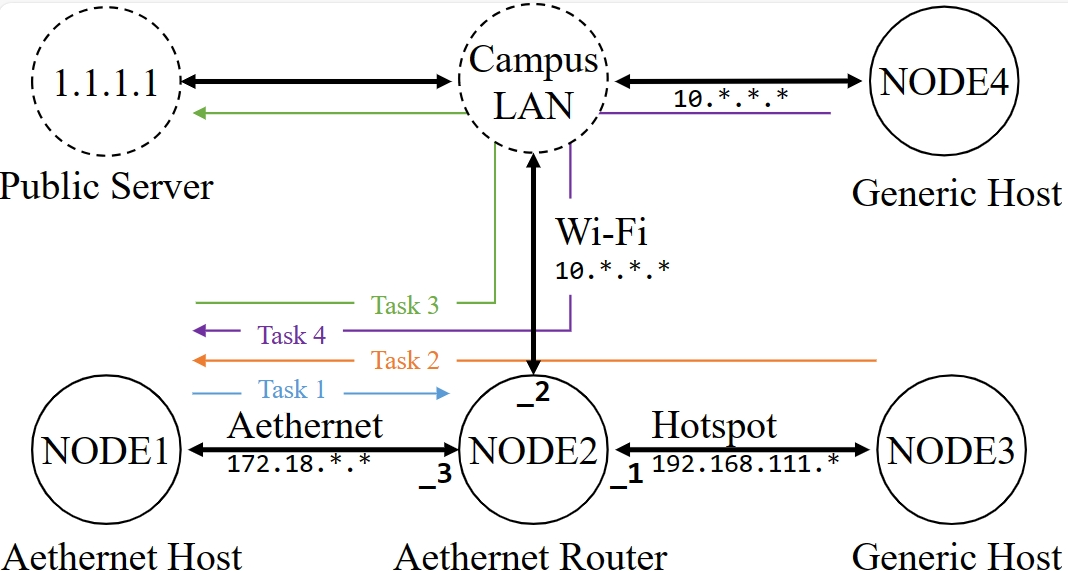

Aimed at the optional, the beginning of each task is pinging through cmd.

If the ping is not raised at NODE1, it will finally be directed to NODE2. NODE2 will find that the destination is in the Aethernet subnet and forward it to NODE1.

NODE1, once received the ping request, will respond though Aethernet. NODE2 will receive the response and forward it to its WLAN interface. Then the response may be sent to the Internet.

If the ping is raised at NODE1, it will first be captured from WLAN interface. Then it will be forwarded to NODE2.